In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import os
from Helper import smooth
from DQN_ER import DQN_ER
from DQN_TN import DQN_TN
from DQN_ER_TN import DQN_ER_TN

# DQN w/ TN only

In [ ]:
n_eval_episodes = 50
envs = gym.make_vec(
    "CartPole-v1",
    5000,
)
eval_envs = gym.make_vec("CartPole-v1", n_eval_episodes // 2)

DQN = DQN_TN(
    env=envs,
    eval_env=eval_envs,
    eval_time=5000,
    TargetNetworkUpdateFq=10000,
    epsilon=0.1,
    gamma=0.9,
    learning_rate=0.001,
    network_size=32,
    seed=69420,
    n_eval_episodes=n_eval_episodes,
)

In [67]:
DQN.TargetNetwork.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,466 (9.63 KB)

 Trainable params: 2,466 (9.63 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Start learning
DQN.train_agent()
returns, timesteps = DQN.eval_returns, DQN.eval_timesteps

Step 5000/1000000, average reward of evaluated episodes: 9.06 +- 0.7045565981523414
Step 10000/1000000, average reward of evaluated episodes: 9.02 +- 0.7068238818828916
Step 15000/1000000, average reward of evaluated episodes: 9.28 +- 0.6337191807101944
Step 20000/1000000, average reward of evaluated episodes: 9.1 +- 0.806225774829855
Step 25000/1000000, average reward of evaluated episodes: 9.1 +- 0.6708203932499369
Step 30000/1000000, average reward of evaluated episodes: 9.08 +- 0.7959899496852959
Step 35000/1000000, average reward of evaluated episodes: 9.2 +- 0.7211102550927979
Step 40000/1000000, average reward of evaluated episodes: 9.18 +- 0.6838128398911504
Step 45000/1000000, average reward of evaluated episodes: 9.34 +- 0.7901898506055364
Step 50000/1000000, average reward of evaluated episodes: 9.32 +- 0.6764613810115105
Step 55000/1000000, average reward of evaluated episodes: 9.4 +- 0.7483314773547882
Step 60000/1000000, average reward of evaluated episodes: 9.32 +- 0.76


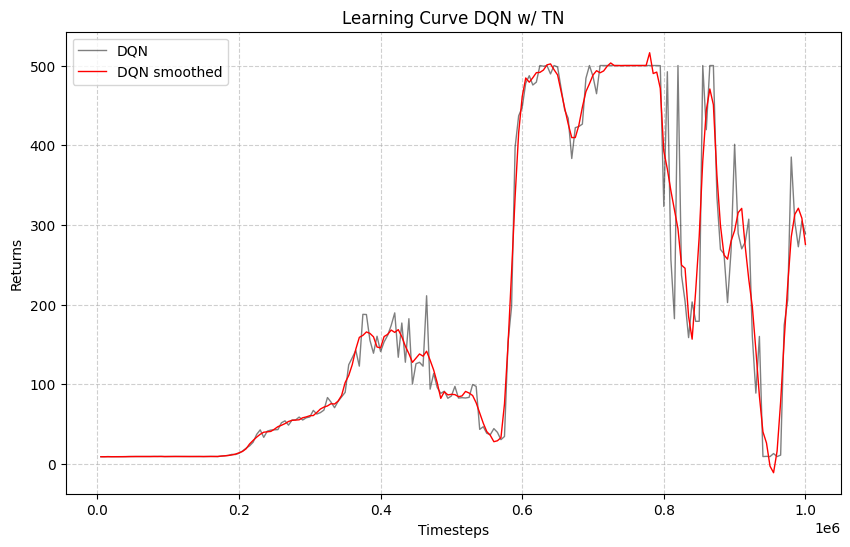

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(timesteps, returns, label='DQN', linewidth=1, alpha=0.5, color='black')
plt.plot(timesteps, smooth(returns, window=9), label='DQN smoothed', linewidth=1, color='red')
plt.xlabel('Timesteps')
plt.ylabel('Returns')
plt.title('Learning Curve DQN w/ TN')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# DQN w/ ER only

In [ ]:
n_eval_episodes = 50
envs = gym.make_vec(
    "CartPole-v1",
    5000,
)
eval_envs = gym.make_vec("CartPole-v1", n_eval_episodes // 2)

DQN = DQN_ER(
    env=envs,
    eval_env=eval_envs,
    eval_time=5000,
    epsilon=0.1,
    gamma=0.9,
    learning_rate=0.001,
    network_size=32,
    replay_buffer_size=100_000,
    batch_size=5000,
    # seed=69420,
    n_eval_episodes=n_eval_episodes,
)

In [56]:
DQN.MainNetwork.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,466 (9.63 KB)

 Trainable params: 2,466 (9.63 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Start learning
DQN.train_agent()
returns, timesteps = DQN.eval_returns, DQN.eval_timesteps

Step 5000/1000001, average reward of evaluated episodes: 452.16 +- 143.66215368008375
Step 10000/1000001, average reward of evaluated episodes: 12.52 +- 9.879757082033953
Step 15000/1000001, average reward of evaluated episodes: 10.5 +- 3.0805843601498726
Step 20000/1000001, average reward of evaluated episodes: 236.88 +- 242.9450670419138
Step 25000/1000001, average reward of evaluated episodes: 235.88 +- 243.77256941665934
Step 30000/1000001, average reward of evaluated episodes: 225.98 +- 242.89326791823606
Step 35000/1000001, average reward of evaluated episodes: 78.68 +- 147.95708026316282
Step 40000/1000001, average reward of evaluated episodes: 10.72 +- 2.7859648238985355
Step 45000/1000001, average reward of evaluated episodes: 13.48 +- 10.06626047745636
Step 50000/1000001, average reward of evaluated episodes: 11.52 +- 5.265890238126883
Step 55000/1000001, average reward of evaluated episodes: 13.8 +- 8.706319543871567
Step 60000/1000001, average reward of evaluated episodes: 

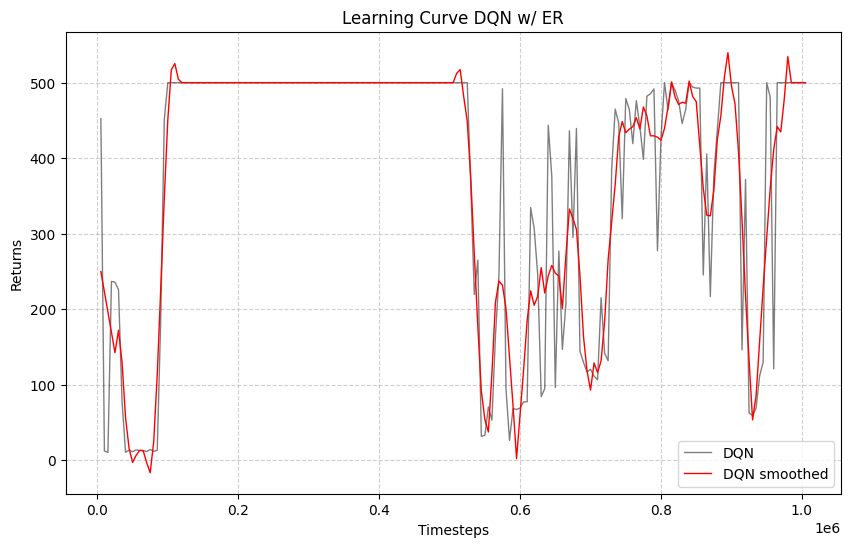

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(timesteps, returns, label='DQN', linewidth=1, alpha=0.5, color='black')
plt.plot(timesteps, smooth(returns, window=9), label='DQN smoothed', linewidth=1, color='red')
plt.xlabel('Timesteps')
plt.ylabel('Returns')
plt.title('Learning Curve DQN w/ ER')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# DQN w/ TN and ER

In [ ]:
n_eval_episodes = 50
envs = gym.make_vec(
    "CartPole-v1",
    5000,
)
eval_envs = gym.make_vec("CartPole-v1", n_eval_episodes // 2)

DQN = DQN_ER_TN(
    env=envs,
    eval_env=eval_envs,
    eval_time=5000,
    TargetNetworkUpdateFq=15000,
    epsilon=0.25,
    gamma=0.9,
    learning_rate=0.001,
    network_size=32,
    replay_buffer_size=100_000,
    batch_size=5000,
    n_eval_episodes=n_eval_episodes,
)

In [93]:
DQN.MainNetwork.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,466 (9.63 KB)

 Trainable params: 2,466 (9.63 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
# Start learning
DQN.train_agent()
returns, timesteps = DQN.eval_returns, DQN.eval_timesteps

Step 5000/1000000, average reward of evaluated episodes: 9.52 +- 0.72773621594641
Step 10000/1000000, average reward of evaluated episodes: 9.06 +- 0.7851114570556208
Step 15000/1000000, average reward of evaluated episodes: 9.32 +- 0.7332121111929345
Step 20000/1000000, average reward of evaluated episodes: 9.2 +- 0.6928203230275509
Step 25000/1000000, average reward of evaluated episodes: 9.2 +- 0.8717797887081347
Step 30000/1000000, average reward of evaluated episodes: 9.16 +- 0.6740919818541087
Step 35000/1000000, average reward of evaluated episodes: 9.38 +- 0.7453858061433689
Step 40000/1000000, average reward of evaluated episodes: 9.28 +- 0.7756287771866126
Step 45000/1000000, average reward of evaluated episodes: 9.44 +- 0.6681317235396026
Step 50000/1000000, average reward of evaluated episodes: 9.1 +- 0.6708203932499369
Step 55000/1000000, average reward of evaluated episodes: 9.04 +- 0.82365041127896
Step 60000/1000000, average reward of evaluated episodes: 9.68 +- 0.76
St

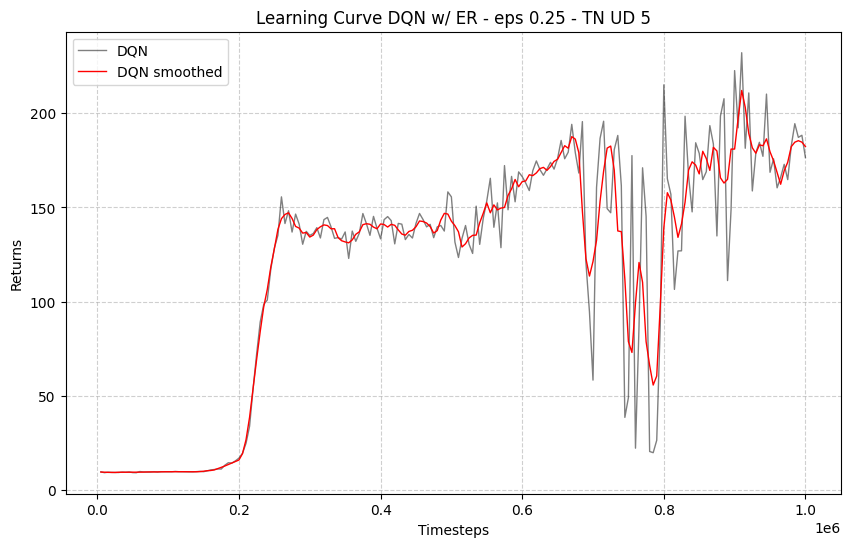

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(timesteps, returns, label='DQN', linewidth=1, alpha=0.5, color='black')
plt.plot(timesteps, smooth(returns, window=9), label='DQN smoothed', linewidth=1, color='red')
plt.xlabel('Timesteps')
plt.ylabel('Returns')
plt.title('Learning Curve DQN w/ ER - eps 0.25 - TN UD 5') 
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

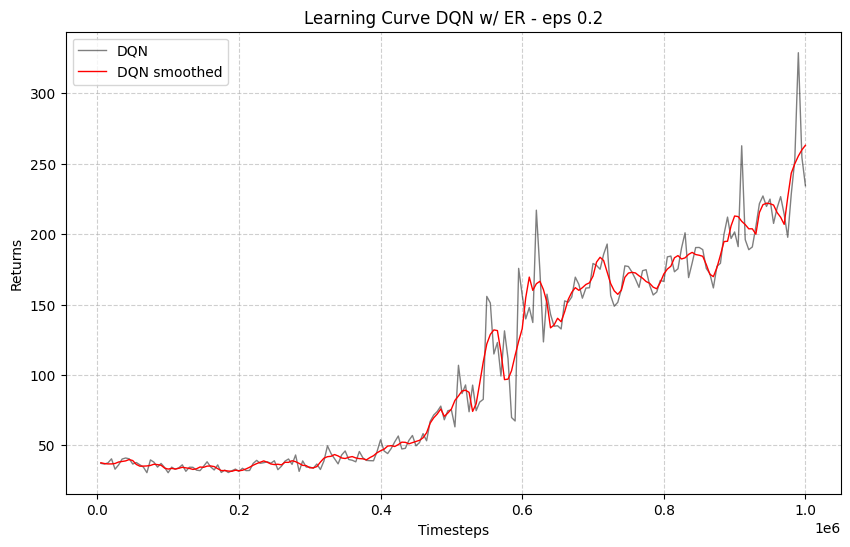

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(timesteps, returns, label='DQN', linewidth=1, alpha=0.5, color='black')
plt.plot(timesteps, smooth(returns, window=9), label='DQN smoothed', linewidth=1, color='red')
plt.xlabel('Timesteps')
plt.ylabel('Returns')
plt.title('Learning Curve DQN w/ ER - eps 0.2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

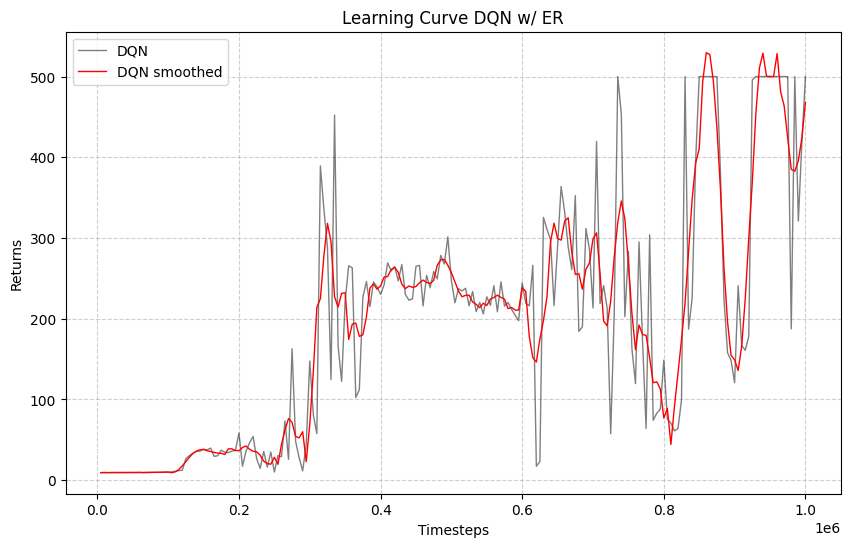

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(timesteps, returns, label='DQN', linewidth=1, alpha=0.5, color='black')
plt.plot(timesteps, smooth(returns, window=9), label='DQN smoothed', linewidth=1, color='red')
plt.xlabel('Timesteps')
plt.ylabel('Returns')
plt.title('Learning Curve DQN w/ ER - eps 0.25') 
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

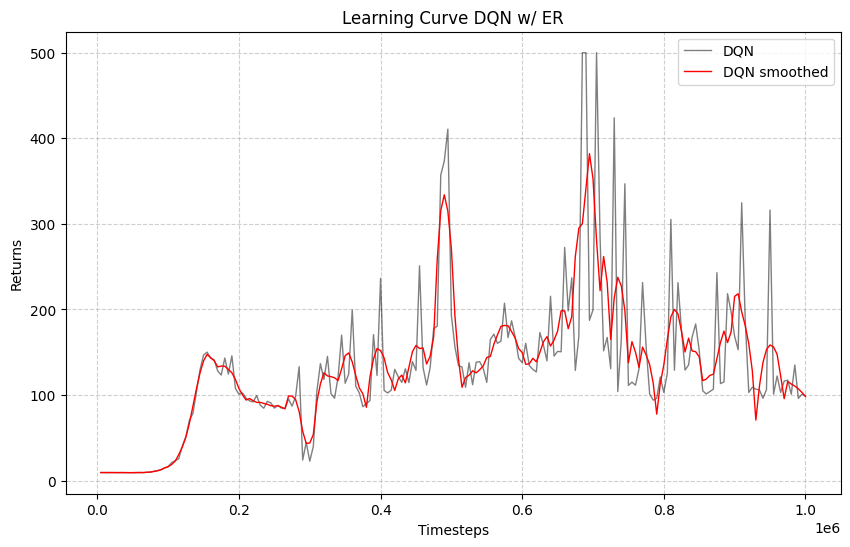

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(timesteps, returns, label='DQN', linewidth=1, alpha=0.5, color='black')
plt.plot(timesteps, smooth(returns, window=9), label='DQN smoothed', linewidth=1, color='red')
plt.xlabel('Timesteps')
plt.ylabel('Returns')
plt.title('Learning Curve DQN w/ ER - eps 0.5')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Random

In [ ]:
# Hyperparameter ranges
learning_rates = [1e-5, 1e-3, 1e-1]
epsilons = [0.05, 0.2, 0.8]
network_sizes = [32, 64, 128]
update_to_data_ratios = [0.1, 0.5, 1.0]

# Store results
results = []

# Load data from files
for lr in learning_rates:
    for eps in epsilons:
        for update_ratio in update_to_data_ratios:
            for nw_size in network_sizes:
                filename = f"NDQN_data_update_ratio{update_ratio}_lr{lr}_eps{eps}_nwsize{nw_size}.npz"
                
                if os.path.exists(filename):
                    data = np.load(filename)
                    rewards = data["learning_curve"]
                    
                    final_reward = rewards[-1]  # Last recorded reward
                    avg_last_100 = np.mean(rewards[-1000:]) if len(rewards) >= 1000 else np.mean(rewards)
                    
                    results.append((lr, eps, update_ratio, nw_size, final_reward, avg_last_100))
                else:
                    print(f"Skipping {filename}, not found.")

# Sort by average last 1000 reward (optional)
results.sort(key=lambda x: x[-1], reverse=True)  

# Generate LaTeX table
latex_table = """
\\documentclass{article}
\\usepackage{booktabs}

\\begin{document}

\\begin{table}[h]
    \\centering
    \\caption{Hyperparameter Results for NDQN}
    \\begin{tabular}{cccccc}
        \\toprule
        \\textbf{Learning Rate} & \\textbf{Epsilon} & \\textbf{Update/Data} & \\textbf{Neurons/Layer} & \\textbf{Final Reward} & \\textbf{Avg Reward (Last 100)} \\\\
        \\midrule
"""

for lr, eps, update_ratio, nw_size, final_reward, avg_last_100 in results:
    latex_table += f"        {lr} & {eps} & {update_ratio} & {nw_size} & {final_reward:.2f} & {avg_last_100:.2f} \\\\\n"

latex_table += """        \\bottomrule
    \\end{tabular}
    \\label{tab:ndqn_results}
\\end{table}

\\end{document}
"""

# Save LaTeX table to a file
with open("ndqn_results.tex", "w") as f:
    f.write(latex_table)

print("LaTeX table saved to ndqn_results.tex")


Skipping NDQN_data_update_ratio1.0_lr1e-05_eps0.05_nwsize32.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr1e-05_eps0.05_nwsize64.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr1e-05_eps0.05_nwsize128.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr1e-05_eps0.2_nwsize32.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr1e-05_eps0.2_nwsize64.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr1e-05_eps0.2_nwsize128.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr1e-05_eps0.8_nwsize32.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr1e-05_eps0.8_nwsize64.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr1e-05_eps0.8_nwsize128.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr0.001_eps0.05_nwsize32.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr0.001_eps0.05_nwsize64.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr0.001_eps0.05_nwsize128.npz, not found.
Skipping NDQN_data_update_ratio1.0_lr0.001_eps0.2_nwsize32.npz, not found.
Skipping NDQN_d